<a href="https://colab.research.google.com/github/Ruchit22solanki/Minimum-Wireless-Charger-Placement-with-Individual-Energy-Requirement/blob/main/PID_greedy_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random 
import math
import matplotlib.pyplot as plt 
import copy as cp
import matplotlib.patches as patches

In [ ]:
class Point2d:
  def __init__(self,x=0,y=0):
    self.x=x
    self.y=y
  
  def __eq__(self,point):
    if self.x==point.x and self.y==point.y:
      return True
    return False 


In [ ]:
class Sensor :
  count_sensors=0
  total_sensors=50
  def __init__(self,point,req_charging_level,charging_level=0):
    self.point=point
    self.req_charging=req_charging_level
    self.curr_charging=0

  def __eq__(self,sensor):
    if self.point.x==sensor.point.x and self.point.y==sensor.point.y:
      return True
    return False 

  def __hash__(self):
    return hash(self.point.x+self.point.y)


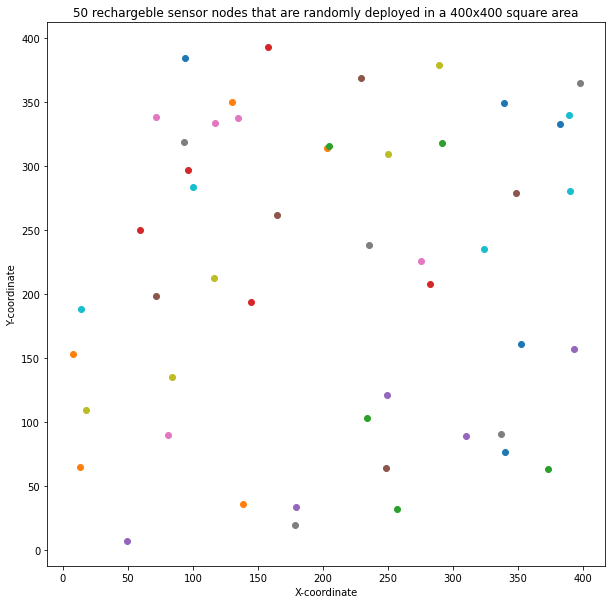

In [ ]:
area=400
sensors=set()
while len(sensors)<Sensor.total_sensors:
  x=random.uniform(0,area)
  y=random.uniform(0,area)
  req_charging=round(random.uniform(10,20))
  point=Point2d(x,y)
  sensors.add(Sensor(point,req_charging))

plt.figure(figsize=(10, 10))
for item in sensors:
  plt.scatter(item.point.x, item.point.y) 
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate") 
plt.title(f"{Sensor.total_sensors} rechargeble sensor nodes that are randomly deployed in a {area}x{area} square area")
plt.show() 


In [ ]:
class Charger :
  charger_energy=1000
  radius=70
  min_power=(2.5*charger_energy)/((radius+15)**2)
  total_chargers=1000
  half_angle=30
  def __init__(self,point):
    self.point=point
    self.theta=0
  
  def __eq__(self,charger):
    if self.point.x==charger.point.x and self.point.y==charger.point.y:
      return True
    return False 

  def __hash__(self):
    return hash(self.point.x+self.point.y)
    
  def charging_level(self,sensor):
    dist=math.sqrt((self.point.x-sensor.point.x)**2+(self.point.y-sensor.point.y)**2)
    p_rx=(2.5*self.charger_energy)/((dist+15)**2)
    p_in=-0.00001*(p_rx**2)+0.57*p_rx+10
    return p_in//self.min_power 

  
  def check_dist(self,sensor):
    return (math.sqrt((self.point.x-sensor.point.x)**2+(self.point.y-sensor.point.y)**2))<=self.radius

  def FindAngle(self,sensor):
    a=sensor.point.x-self.point.x
    b=sensor.point.y-self.point.y
    angle=math.degrees(math.atan2(b,a))
    if angle < 0 :
      angle=angle+360
    sensor.theta=angle
    return angle

  def InsideSector(self,theta):
      a=math.cos(math.radians(theta-self.theta))
      b=math.cos(math.radians(self.half_angle))
      if a>= b :
        return True
      
      return False  

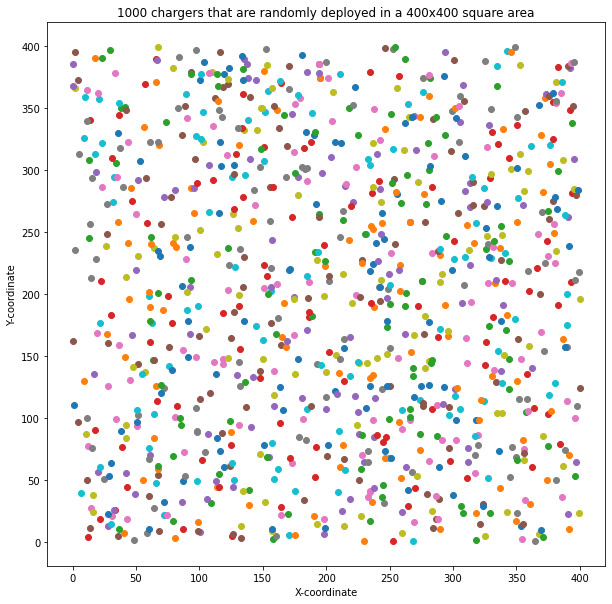

In [ ]:
chargers=set()
while len(chargers)<Charger.total_chargers:
    x=random.uniform(0,area)
    y=random.uniform(0,area)
    charger=Charger(Point2d(x,y))
    chargers.add(charger)

plt.figure(figsize=(10, 10))
for item in chargers:
  plt.scatter(item.point.x, item.point.y) 
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate") 
plt.title(f"{Charger.total_chargers} chargers that are randomly deployed in a {area}x{area} square area")
plt.show()   


In [ ]:
selected_chargers=set()
remained=Sensor.total_sensors
while Sensor.count_sensors<Sensor.total_sensors:
  m=-1
  for charger in chargers:
    final_size=0
    final_theta=0
    sensors_range=[]
    for item in sensors:
      if ((charger.check_dist(item)) and (item.curr_charging<item.req_charging)) :
        sensors_range.append(item)
    sensors_range.sort(key=charger.FindAngle)
    for i in range(len(sensors_range)):
      sensor_angle=charger.FindAngle(sensors_range[i])
      charger.theta=(sensor_angle+Charger.half_angle)%360
      size=0
      index=i
      while ((size<len(sensors_range)) and (charger.InsideSector(charger.FindAngle(sensors_range[index])))) :
          size+=1
          index+=1
          index%=len(sensors_range)
          
      if (size>=final_size) :
        final_theta=charger.theta
        final_size=size
    
    charger.theta=final_theta

    L=0
    for item in sensors:
      if ((charger.check_dist(item)) and (item.curr_charging<item.req_charging) and (charger.InsideSector(charger.FindAngle(item)))) :
          chr_level=charger.charging_level(item)
          if ((chr_level+item.curr_charging)>item.req_charging):
            L+=item.req_charging-item.curr_charging
          else:  
            L+=chr_level

    if L>m:
      m=L
      nex=charger
  if ((len(chargers)==0) and (Sensor.total_sensors>Sensor.count_sensors)) :
    print(f"not enough chargers:{Sensor.total_sensors-Sensor.count_sensors} sensors still remained to fulfill their required charging level")
    break
  selected_chargers.add(nex)
  for item in sensors:
    if ((nex.check_dist(item)) and (item.curr_charging<item.req_charging) and (nex.InsideSector(nex.FindAngle(item)))) :
      L=nex.charging_level(item)
      if ((item.curr_charging+L)>=item.req_charging) :
        Sensor.count_sensors+=1
        item.curr_charging=item.req_charging
      else:
        item.curr_charging+=L
  chargers.discard(nex)
  
  if (remained > (Sensor.total_sensors-Sensor.count_sensors)) :
    remained=Sensor.total_sensors-Sensor.count_sensors
    print(f"{remained} sensors remained , number of chargers {len(selected_chargers)}")


  


44 sensors remained , number of chargers 1
40 sensors remained , number of chargers 2
37 sensors remained , number of chargers 3
34 sensors remained , number of chargers 4
31 sensors remained , number of chargers 5
28 sensors remained , number of chargers 6
25 sensors remained , number of chargers 7
23 sensors remained , number of chargers 8
20 sensors remained , number of chargers 9
18 sensors remained , number of chargers 10
16 sensors remained , number of chargers 11
14 sensors remained , number of chargers 12
12 sensors remained , number of chargers 13
10 sensors remained , number of chargers 14
9 sensors remained , number of chargers 15
8 sensors remained , number of chargers 16
7 sensors remained , number of chargers 17
6 sensors remained , number of chargers 18
5 sensors remained , number of chargers 19
4 sensors remained , number of chargers 20
3 sensors remained , number of chargers 21
2 sensors remained , number of chargers 22
1 sensors remained , number of chargers 23
0 sens

number of chargers : 24


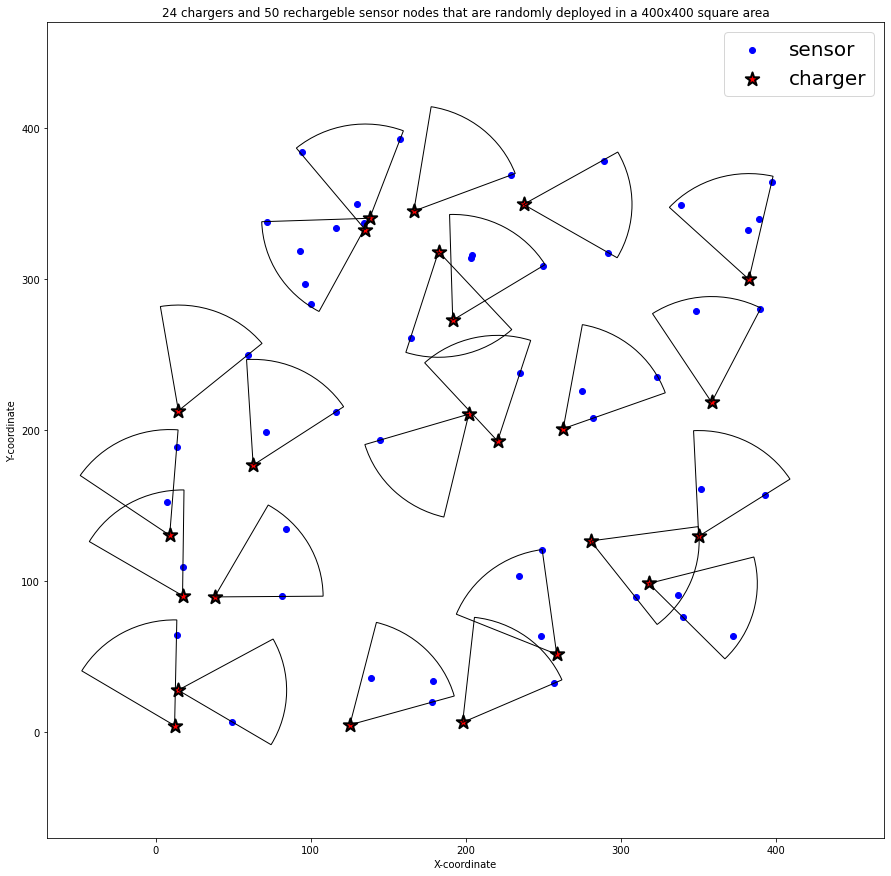

In [ ]:
print("number of chargers :",len(selected_chargers))

fig,ax = plt.subplots(figsize=(15, 15))
for item in sensors:
  plt1=plt.scatter(item.point.x, item.point.y,c='b') 


for item in selected_chargers:
  t1=(item.theta-Charger.half_angle)%360
  t2=(item.theta+Charger.half_angle)%360
  sector=patches.Wedge((item.point.x, item.point.y),Charger.radius,t1,t2,color="black",fill=False)
  ax.add_patch(sector)
  plt2=plt.scatter(item.point.x,item.point.y, c ='r',linewidths = 2,edgecolor="black" ,marker ="*",s = 200)


plt.legend([plt1,plt2],["sensor","charger"],prop={'size':20})
plt.axis([-(Charger.radius), area+Charger.radius, -(charger.radius),area+Charger.radius])
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate") 
plt.title(f"{len(selected_chargers)} chargers and {Sensor.total_sensors} rechargeble sensor nodes that are randomly deployed in a {area}x{area} square area")
plt.show()


